# Defect

In [1]:
from simulation import Simulation, heatmap
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def simulate_and_plot(nqubits, lam, maxdepth, pbc=True):

    sim = Simulation()
    sim.initialize(nqubits)

    data = []

    for _ in range(maxdepth):
        xs = [sim.peek_x(n) for n in range(nqubits)]
        data.append(xs)
        sim.E_lambda(random.randint(0, nqubits - 1), lam, pbc)

    # plot
    scatter_x = list(range(0, nqubits))
    scatter_y = list(range(len(data)))
    scatter_z = np.zeros((len(scatter_x), len(scatter_y)))
    for d in range(len(data)):
        x = data[d]
        for i, v in enumerate(x):
            # scatter_z[i, d] = v
            # we only care about the values on even sites (odd in Python 0 indexing)
            # so set the odd (even Python) sites all to 1
            scatter_z[i, d] = v if i % 2 else 1
    heatmap(
        scatter_x,
        scatter_y,
        scatter_z,
        "sites",
        "depth",
        f"nqubits = {nqubits}, lam = {lam}, pbc = {pbc}",
        r"$\langle X \rangle$",
        "inferno",
    )
    plt.xlim([0, nqubits])
    plt.ylim([0, maxdepth])
    plt.show()

### With PBC

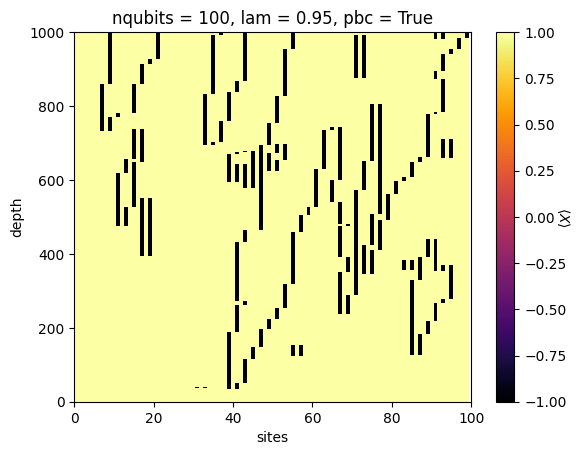

In [4]:
simulate_and_plot(100, 0.95, 1000)
# simulate_and_plot(100, 0.95, 10000)
# simulate_and_plot(100, 0.99, 10000)

### With open boundary conditions

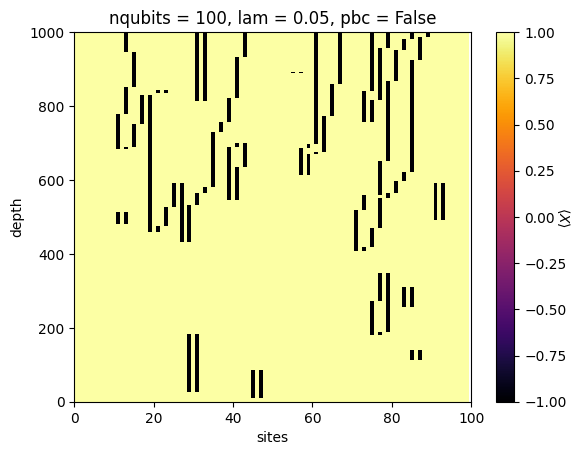

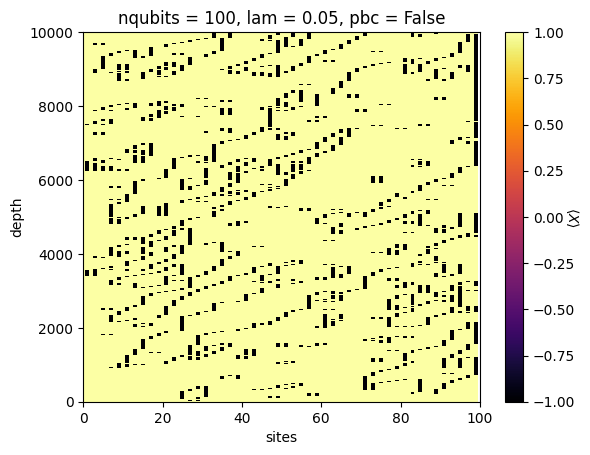

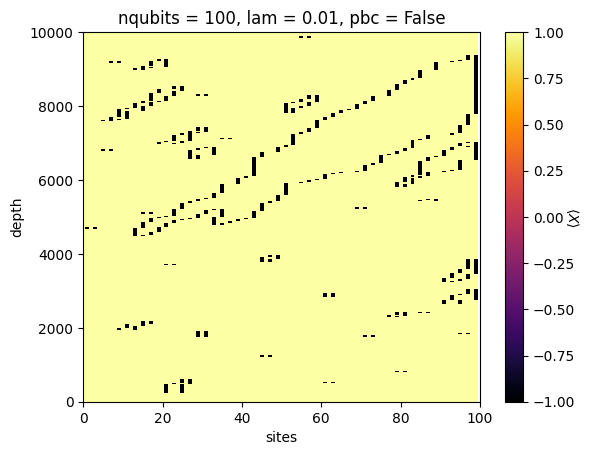

In [37]:
simulate_and_plot(100, 0.95, 1000, False)
simulate_and_plot(100, 0.95, 10000, False)
simulate_and_plot(100, 0.99, 10000, False)